In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter("ignore")
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler

In [2]:
wm = pd.read_csv(r'WineMatters.csv')
wm.head(10)

,WineID,Aging_Time,Litters_Barrel,Type,Magnesium,Residual_Sugar,Sulphites,Barrel,Grapes,Acidity,...,Red_Fruit,Citric,Density,Color_Intensity,Cloudiness,Alcohol,Astringency,Satisfaction_France,Satisfaction_Spain,Satisfaction_Portugal
0,1,65,265,White,0,0.0,Not Present,Aluminium,Single,0,...,2,4,2,3,3,0,0,6,6,4
1,2,47,2464,Red,310,305.0,Present,Aluminium,Single,4,...,0,2,2,3,4,0,0,8,6,4
2,3,15,2138,White,0,0.0,Not Present,Aluminium,Single,3,...,2,0,2,2,3,0,0,8,8,4
3,4,60,623,White,0,0.0,Not Present,Aluminium,Single,0,...,3,4,3,1,1,0,0,2,2,6
4,5,70,354,White,0,0.0,Not Present,Aluminium,Single,0,...,4,3,4,2,2,0,0,4,4,10
5,6,30,1894,Red,0,0.0,Not Present,Aluminium,Single,4,...,2,0,2,2,5,0,0,10,8,4
6,7,66,227,White,17,15.0,Not Present,Aluminium,Single,0,...,2,5,5,5,5,0,0,10,10,6
7,8,10,1812,Red,0,0.0,Not Present,Aluminium,Single,3,...,2,0,2,2,3,0,0,8,8,4
8,9,56,73,White,0,0.0,Present,Aluminium,Single,0,...,5,3,5,4,4,0,0,2,8,8
9,10,22,1556,Red,30,26.0,Not Present,Aluminium,Single,4,...,2,0,2,2,2,0,0,10,8,4


In [3]:
wm.shape

(129881, 23)

In [4]:
wm.set_index('WineID', inplace = True)

<AxesSubplot:xlabel='Magnesium'>

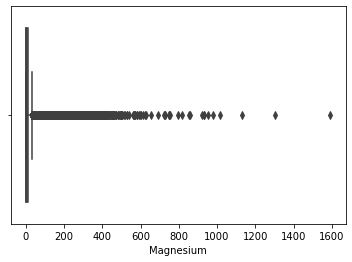

In [5]:
sns.boxplot(x='Magnesium', data = wm)

In [6]:
wm_droprow1 =  wm[wm['Magnesium'] < 500]
wm_droprow1.shape

(129838, 22)

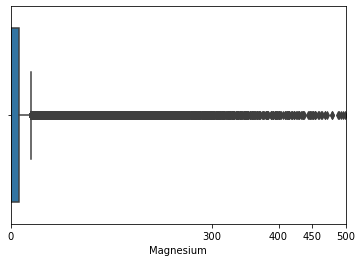

In [7]:
ax=sns.boxplot(x='Magnesium', data = wm_droprow1)
ax.set_xlim(0, 500)
ax.set_xticks([0, 300, 400, 450, 500])

In [8]:
wm_droprow1 =  wm[wm['Magnesium'] < 450]

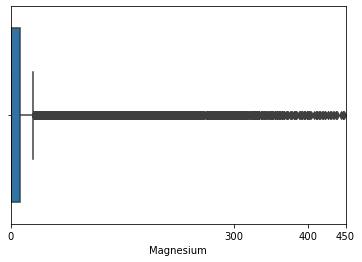

In [11]:
ax=sns.boxplot(x='Magnesium', data = wm_droprow1)
ax.set_xlim(0, 450)
ax.set_xticks([0, 300, 400, 450])

In [14]:
wm_droprow1 =  wm[wm['Magnesium'] < 440]

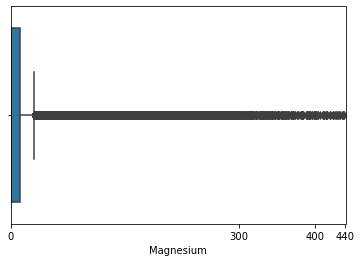

In [15]:
ax=sns.boxplot(x='Magnesium', data = wm_droprow1)
ax.set_xlim(0, 440)
ax.set_xticks([0, 300, 400, 440])

In [16]:
wm_after_Magnesium=wm_droprow1
wm_after_Magnesium.shape

(129811, 22)

<AxesSubplot:xlabel='Residual_Sugar'>

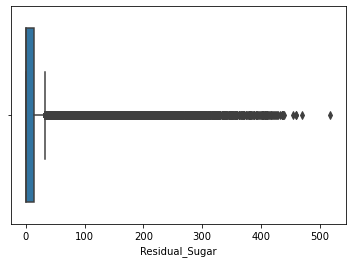

In [17]:
sns.boxplot(x='Residual_Sugar', data = wm_after_Magnesium)

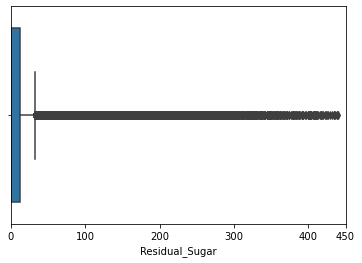

In [18]:
ax=sns.boxplot(x='Residual_Sugar', data = wm_after_Magnesium)
ax.set_xlim(0, 450)
ax.set_xticks([0, 100, 200, 300, 400, 450])

In [21]:
wm_after_ResidualSugar=  wm_after_Magnesium[wm_after_Magnesium['Residual_Sugar'] < 450]
wm_after_ResidualSugar.shape

(129417, 22)

<AxesSubplot:xlabel='Litters_Barrel'>

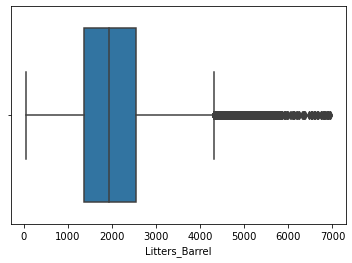

In [22]:
sns.boxplot(x='Litters_Barrel', data = wm_after_ResidualSugar)

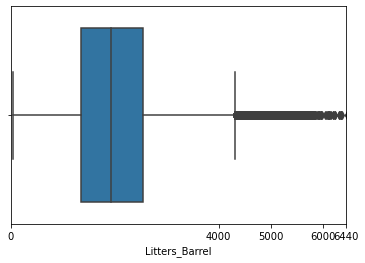

In [23]:
ax=sns.boxplot(x='Litters_Barrel', data = wm_after_ResidualSugar)
ax.set_xlim(0, 6440)
ax.set_xticks([0, 4000, 5000, 6000, 6440])

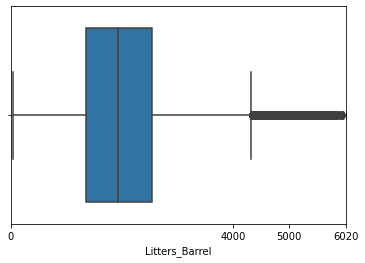

In [24]:
ax=sns.boxplot(x='Litters_Barrel', data = wm_after_ResidualSugar)
ax.set_xlim(0, 6020)
ax.set_xticks([0, 4000, 5000, 6020])

In [25]:
wm_after_outliers=  wm_after_ResidualSugar[wm_after_ResidualSugar['Litters_Barrel'] < 6420]
wm_after_outliers.shape

(129375, 22)

In [29]:
129375*0.97

125493.75